In this example, we will demonstrate how a machine learning algorithm can be used to classify input images, in this case, hand-written digits between 0 and 9.

In this case, we do not have to perform a feature recognition step: we can feed the input images directly into a machine learning algorithm. This isn't always the case, if you are attempting to classify large images. But it's a good start.

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

In [2]:
digits = datasets.load_digits()

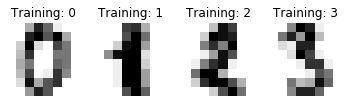

In [17]:
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:4]):
    #plt.figure(figsize=(10,10))
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [18]:
# Reshape the data so that it reads as n samples by m features
# In this case, since we had 8 x 8 images, we have 64 features
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [20]:
## Learn on the first half of the digits
classifier = svm.SVC(gamma=0.001)
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

## And predict based on the second half
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s: \n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix: \n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False): 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97    

In [ ]:
metrics.confusion_matrix()

Can you think of a way to perform this same classification using a feature extraction method? Try calculating a feature features, and see if you can get a classifier that gets decent performance.